In [1]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
from funcs.imgproc import get_imgs_designmx, show_stim, get_rms_contrast, get_contrast_df, get_img_prf
from funcs.rf_tools import get_mask, css_gaussian_cut, make_circle_mask, make_visrois_dict, write_prf_dict
from matplotlib.ticker import MultipleLocator

from funcs.utility import print_dict_structure, print_large, get_zscore


In [3]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'y', n_subjects=n_subjects)
prf_dict = write_prf_dict(binary_masks = vismask_dict)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 

In [9]:
# rms_df10k3 = get_contrast_df(10000, start_img_no = 20000, roi = 'V1', subject = 'subj01', ecc_max = 1, ecc_strict = 'y', prf_proc_dict = prf_dict, binary_masks = vismask_dict, rf_type = 'center')
# rms_df10k3.to_pickle('rms_df10k3.pkl')

Processing image number: 20000 out of 30000
Processing image number: 20010 out of 30000
Processing image number: 20020 out of 30000
Processing image number: 20030 out of 30000
Processing image number: 20040 out of 30000
Processing image number: 20050 out of 30000
Processing image number: 20060 out of 30000
Processing image number: 20070 out of 30000
Processing image number: 20080 out of 30000
Processing image number: 20090 out of 30000
Processing image number: 20100 out of 30000
Processing image number: 20110 out of 30000
Processing image number: 20120 out of 30000
Processing image number: 20130 out of 30000
Processing image number: 20140 out of 30000
Processing image number: 20150 out of 30000
Processing image number: 20160 out of 30000
Processing image number: 20170 out of 30000
Processing image number: 20180 out of 30000
Processing image number: 20190 out of 30000
Processing image number: 20200 out of 30000
Processing image number: 20210 out of 30000
Processing image number: 20220 o

In [43]:
testdf = get_contrast_df(31, start_img_no = 0, roi = 'V1', subject = 'subj01', ecc_max = 1, ecc_strict = 'y', prf_proc_dict = prf_dict, binary_masks = vismask_dict, rf_type = 'center')


Processing image number: 0 out of 31
Processing image number: 10 out of 31
Processing image number: 20 out of 31
Processing image number: 30 out of 31


In [36]:
rms_subj01_V1 = pd.read_pickle('/home/rfpred/rms_df_subj01_V1_central2deg.pkl')
rms_subj01_V1.shape[0]

30000

In [45]:
testdf


,rms,image_id,roi,subject,central_radius
0,23.642583,46002,V1,subj01,1
1,63.647350,61882,V1,subj01,1
2,15.106963,828,V1,subj01,1
3,15.123642,67573,V1,subj01,1
4,32.203252,16020,V1,subj01,1
5,22.156957,40422,V1,subj01,1
6,7.983652,51517,V1,subj01,1
7,12.868486,62325,V1,subj01,1
8,19.644962,50610,V1,subj01,1
9,50.201716,55065,V1,subj01,1


In [50]:
# rms_subj01_V1.insert(4, 'central_radius', np.ones((30000,1)).astype('int'))rms_subj01_V1

In [59]:
# Standardize the root mean square values by turning them into z-scores
rms_z = get_zscore(rsm_subj01_V1['rms'], print_ars = 'n')
rms_subj01_V1['rms'] = rms_z

In [52]:
rms_subj01_V1


,rms,image_id,roi,subject,central_radius
0,-0.166415,46002,V1,subj01,1
1,3.080989,61882,V1,subj01,1
2,-0.859298,828,V1,subj01,1
3,-0.857944,67573,V1,subj01,1
4,0.528501,16020,V1,subj01,1
...,...,...,...,...,...
29995,0.219800,13773,V1,subj01,1
29996,0.618843,66767,V1,subj01,1
29997,0.623565,53167,V1,subj01,1
29998,1.721059,1943,V1,subj01,1


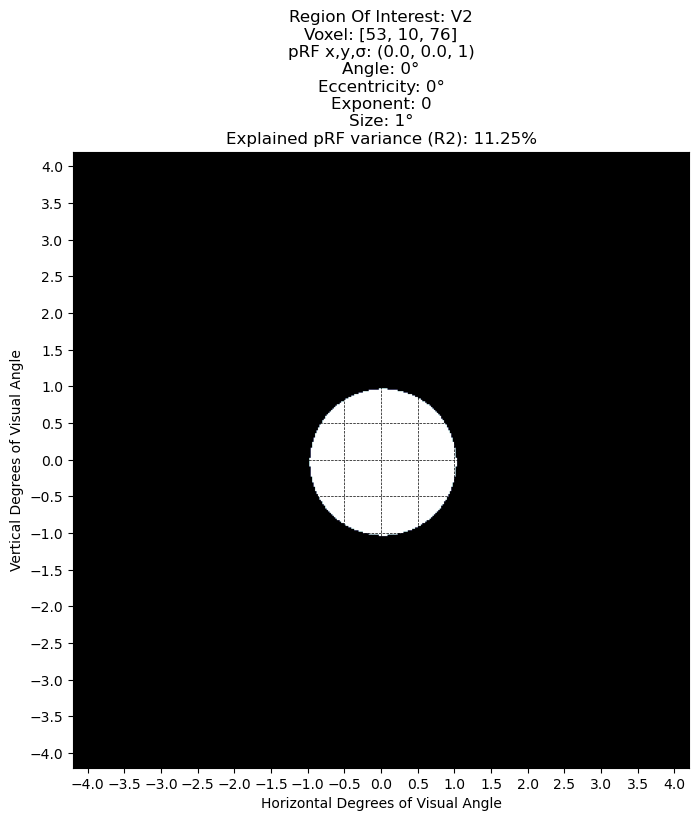

In [53]:
info = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=0, sigma_max = 1.2, 
                                        ecc_max = 1, fill_outline = 'y', grid = 'y')


In [7]:
info['mask']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

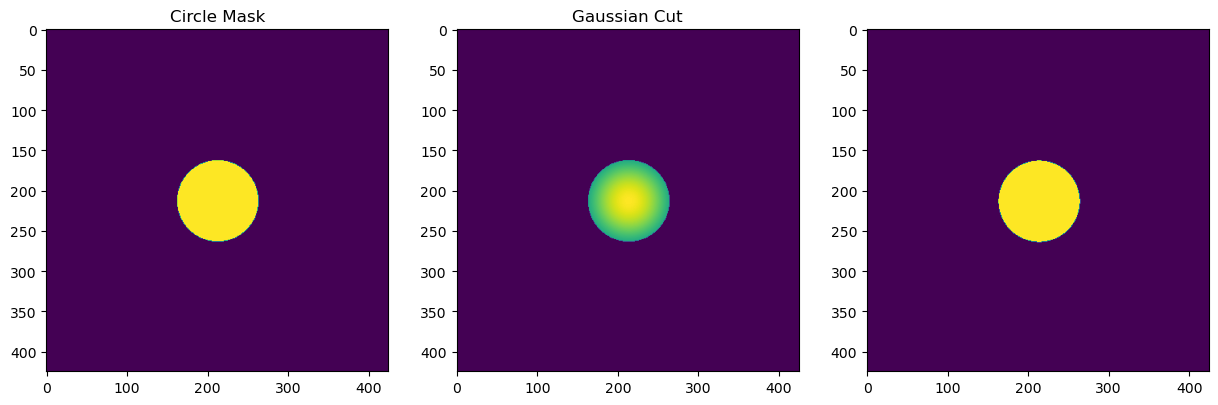

In [8]:
import matplotlib.pyplot as plt

# Assuming make_circle_mask and css_gaussian_cut are functions that return images

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image in the first subplot
axs[0].imshow(make_circle_mask(425, 213, 213, (425/8.4), fill='y', margin_width=0))
axs[0].set_title('Circle Mask')

# Plot the second image in the second subplot
axs[1].imshow(css_gaussian_cut(425, 213, 213, (425/8.4)))
axs[1].set_title('Gaussian Cut')

axs[2].imshow(info['mask'])

# Display the subplots
plt.show()


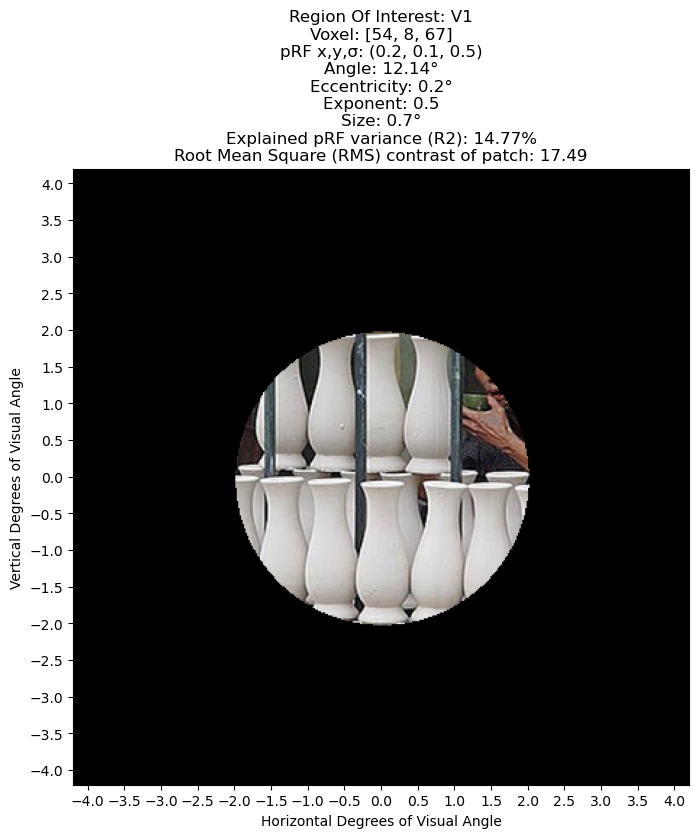

In [58]:
prf_details = get_img_prf(show_stim(hide='y')[0], type='circle', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .4, 
            sigma_max = 4.2, ecc_max = 1, rand_seed=None, invert='n', central = 'y', grid = 'n')



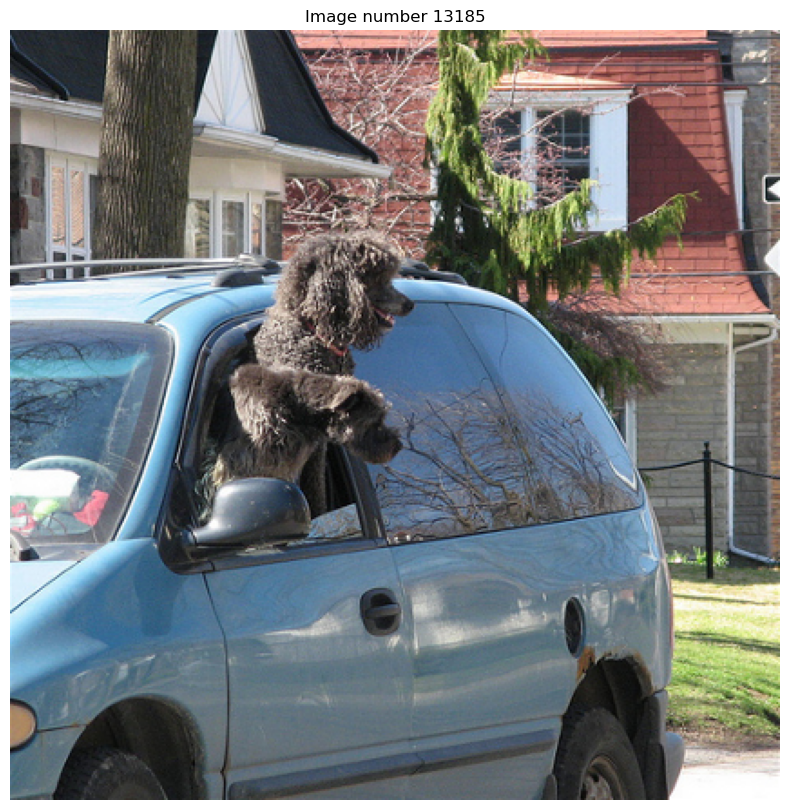

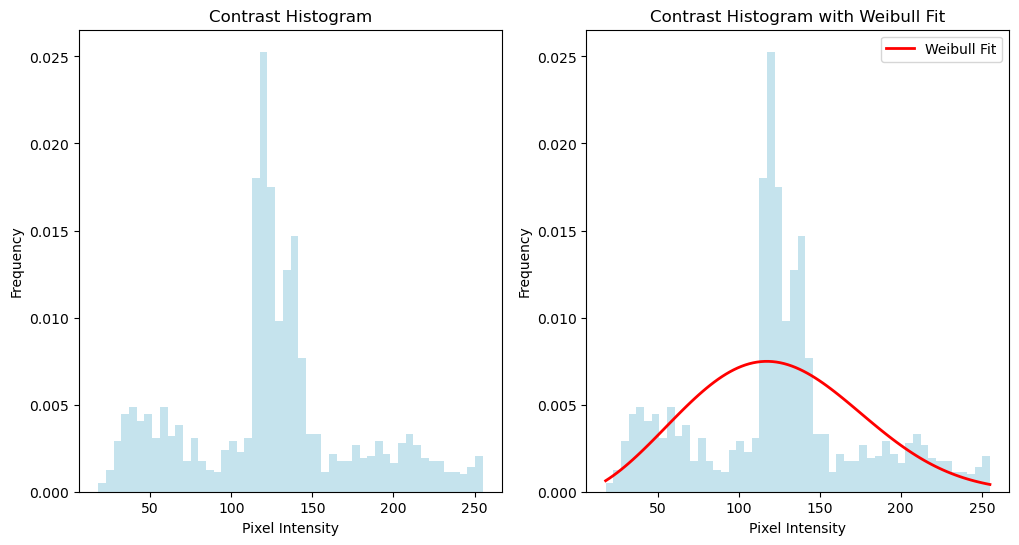

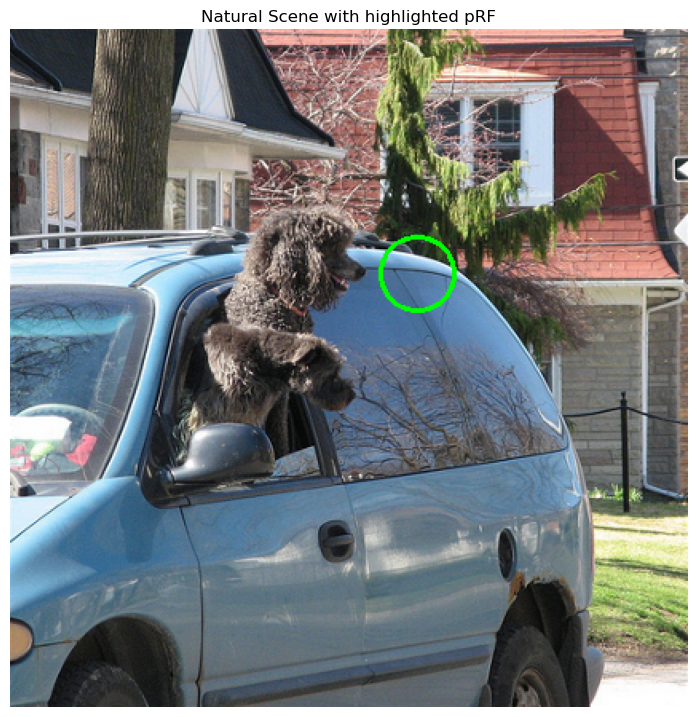

In [15]:
# center = (prf_details['x'].astype(int), prf_details['y'].astype(int))

# rms_contrast, weibull_params, image_with_circle, mask, patch_pixels, mean_intensity = calculate_rms_contrast_circle(image_array = show_stim()[0], center = center, radius = prf_details['pix_radius'].astype(int))